In [2]:
# Based on https://studywolf.wordpress.com/2020/03/13/converting-your-keras-model-into-a-spiking-neural-network-using-nengo-dl/

%matplotlib inline

import matplotlib.pyplot as plt
import nengo
import nengo_dl
import numpy as np
import tensorflow as tf

import utils

11501568/11490434 [==============================] - 1s 0us/step


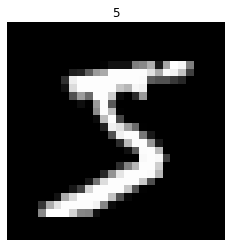

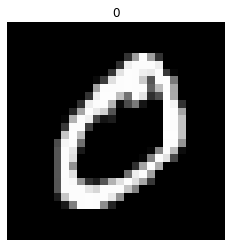

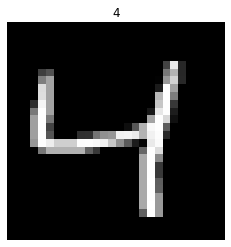

In [3]:
# load MNIST data

minibatch_size = 200
train_images, train_labels, test_images, test_labels = utils.load_mnist(plot=True)



In [4]:
# build a Keras network
tf.random.set_seed(0)

input_ = tf.keras.Input(shape=(28,28,1))
conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3,activation=tf.nn.relu)(input)
flatten = tf.keras.layers.Flatten()(conv1)
dense1 = tf.keras.layers.Dense(units=10)(flatten)

model = tf.keras.Model(inputs=input_, outputs=dense1)

In [5]:
# convert the Keras network to Nengo
converter = nengo_dl.Converter(model, swap_activations={tf.nn.relu: nengo.RectifiedLinear()})
net = converter.net
nengo_input = converter.inputs[input]
nengo_output = converter.outputs[dense1]

In [ ]:
# train with NengoDL
with nengo_dl.Simulator(net, seed=0) as sim:
    sim.compile(optimizer=tf.optimizers.RMSprop(0.001),
                loss={nengo_output: tf.losses.SparseCategoricalCrossentropy(from_logits=True)})
    sim.fit(train_images, {nengo_output: train_labels}, epochs=10)
    
    # save parameters to a file
    sim.save_params("mnist_params")

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
Construction finished in 0:00:00                                               
Epoch 1/10
|             Constructing graph: build stage (0%)             | ETA:  --:--:--

/Users/katarzynaweronika/opt/anaconda3/envs/nengo_env/lib/python3.10/site-packages/nengo_dl/simulator.py:1765: UserWarning: Number of elements (1) in ['ndarray'] does not match number of Nodes (3); consider using an explicit input dictionary in this case, so that the assignment of data to objects is unambiguous.
  warnings.warn(


60000/60000 [==============================] - 219s 4ms/step - loss: 0.5212 - probe_loss: 0.5212
Epoch 2/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.4653 - probe_loss: 0.4653
Epoch 3/10
60000/60000 [==============================] - 238s 4ms/step - loss: 0.4324 - probe_loss: 0.4324
Epoch 4/10
60000/60000 [==============================] - 229s 4ms/step - loss: 0.4784 - probe_loss: 0.4784
Epoch 5/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.4753 - probe_loss: 0.4753
Epoch 6/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.4688 - probe_loss: 0.4688
Epoch 7/10
10524/60000 [====>.........................] - ETA: 3:01 - loss: 0.4646 - probe_loss: 0.4646